# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [164]:
#from types import SimpleNamespace
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from HSMC123 import HouseholdSpecializationModelClass as HSMC


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

/Users/FrederikBank/Desktop/programmering 2/projects-2023-andy-bank/inauguralproject/HSMC123.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  H=((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma)**(par.sigma/(par.sigma-1)))
/Users/FrederikBank/Desktop/programmering 2/projects-2023-andy-bank/inauguralproject/HSMC123.py:64: RuntimeWarning: invalid value encountered in reciprocal
  H=((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma)**(par.sigma/(par.sigma-1)))
/Users/FrederikBank/Desktop/programmering 2/projects-2023-andy-bank/inauguralproject/HSMC123.py:68: RuntimeWarning: invalid value encountered in multiply
  Q = C**par.omega*H**(1-par.omega)
/var/folders/n7/clm_dtzj5gb9b6g7dj7y6krh0000gp/T/ipykernel_54213/1556139465.py:18: RuntimeWarning: invalid value encountered in double_scalars
  ratios.append(opt.HF / opt.HM)


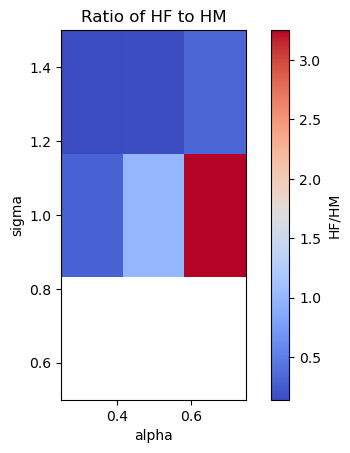

In [165]:
model = HSMC()
#define alpha and simga

# define a range of values for alpha and sigma
alpha_vals = [0.25, 0.5, 0.75]
sigma_vals = [0.5, 1.0, 1.5]

# create a grid of alpha and sigma values
alpha_grid, sigma_grid = np.meshgrid(alpha_vals, sigma_vals)

# compute the ratio HF/HM for each combination of alpha and sigma
ratios = []
for alpha, sigma in zip(alpha_grid.ravel(), sigma_grid.ravel()):
    model = HSMC()
    model.par.alpha = alpha
    model.par.sigma = sigma
    opt = model.solve_discrete(do_print=False)
    ratios.append(opt.HF / opt.HM)

# reshape the ratios into a grid
ratio_grid = np.array(ratios).reshape(alpha_grid.shape)

# create the heatmap plot
plt.imshow(ratio_grid, cmap='coolwarm', origin='lower', 
           extent=[alpha_vals[0], alpha_vals[-1], sigma_vals[0], sigma_vals[-1]])
plt.colorbar(label='HF/HM')
plt.xlabel('alpha')
plt.ylabel('sigma')
plt.title('Ratio of HF to HM')
plt.show()


# Question 2

Explain your code and procedure

LM = 6.0000
HM = 4.0000
LF = 3.0000
HF = 5.0000
LM = 5.0000
HM = 4.5000
LF = 4.0000
HF = 4.5000
LM = 4.5000
HM = 4.5000
LF = 4.5000
HF = 4.5000
LM = 4.0000
HM = 4.5000
LF = 5.0000
HF = 4.0000
LM = 3.0000
HM = 5.0000
LF = 5.5000
HF = 4.0000


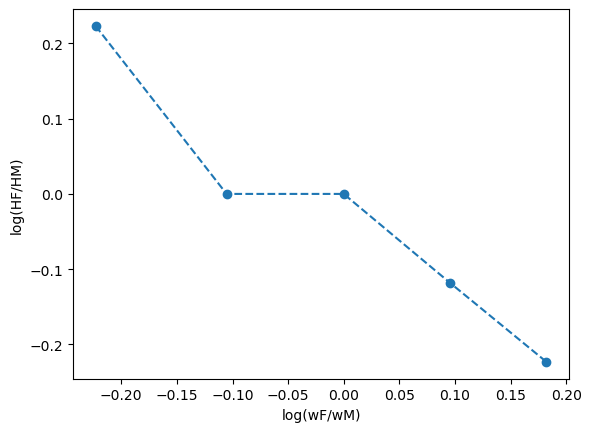

In [166]:


model = HSMC()

# set wF values
model.par.wF_vec = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

# solve for each wF value
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    opt = model.solve_discrete(do_print=True)
    model.sol.LM_vec[i] = opt.LM
    model.sol.HM_vec[i] = opt.HM
    model.sol.LF_vec[i] = opt.LF
    model.sol.HF_vec[i] = opt.HF

# calculate log ratios
log_HF_HM1 = np.log(model.sol.HF_vec / model.sol.HM_vec)
log_wF_wM1 = np.log(model.par.wF_vec / model.par.wM)

# plot log ratios against log wF/wM
plt.plot(log_wF_wM1, log_HF_HM1, 'o', linestyle ='--')
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.show()



# Question 3

Explain your code and procedure

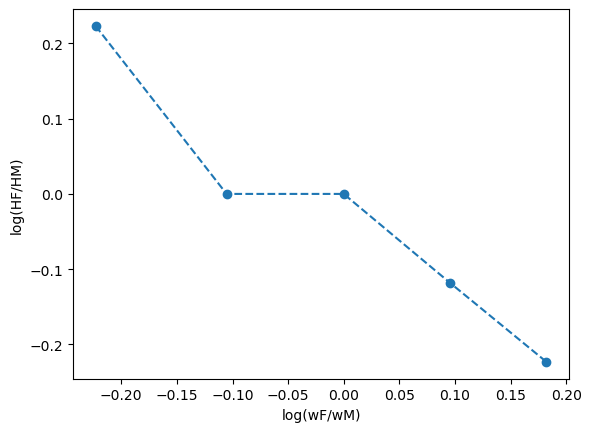

In [167]:

model = HSMC()

# set wF values
model.par.wF_vec = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

# solve for each wF value
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    opt = model.solve_discrete(do_print=False)
    model.sol.LM_vec[i] = opt.LM
    model.sol.HM_vec[i] = opt.HM
    model.sol.LF_vec[i] = opt.LF
    model.sol.HF_vec[i] = opt.HF

# calculate log ratios
log_HF_HM2 = np.log(model.sol.HF_vec / model.sol.HM_vec)
log_wF_wM2= np.log(model.par.wF_vec / model.par.wM)

# plot log ratios against log wF/wM
plt.plot(log_wF_wM2, log_HF_HM2, 'o', linestyle ='--')
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.show()





ADD CONCISE CONLUSION.

Questions 4

Text(0, 0.5, '$log(H_F/H_M)$')

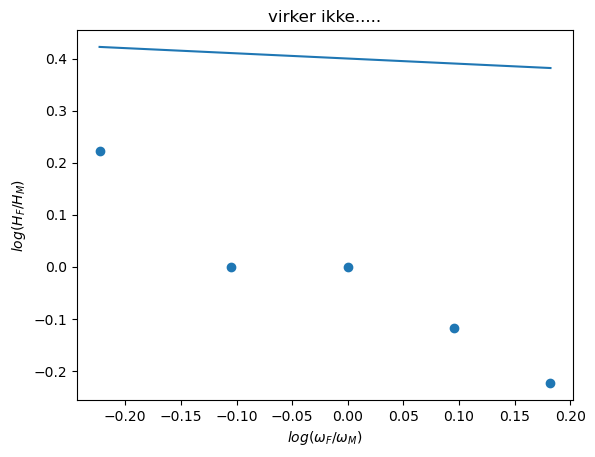

In [168]:

model.estimate()


log_timer= np.log(model.sol.HF_vec/model.sol.HM_vec)

fig4 = plt.figure()
ax = fig4.add_subplot(1,1,1)


ax.scatter(np.log(model.par.wF_vec),log_timer)

ax.plot(np.log(model.par.wF_vec),model.par.beta0_target+model.par.beta1_target*np.log(model.par.wF_vec))

ax.set_title('virker ikke.....')
ax.set_xlabel('$log(\omega_F/\omega_M)$')
ax.set_ylabel('$log(H_F/H_M)$')

Alpha -> 1 suggests that women are more productive than men in household.  Sigma-> 1  implies an increase in the elasticity of substitution, and Siminski and Yetsenga finds sigma = 0.095 which suggests parity between home production work for the two genders first occurs when women make 109 times more than men. These findings suggest that women tend to work more in house production than men, regardless of the relative wage differences. The beta_0 suggests that women do more home production work than men, whereas beta_1 suggests that women’s home production decreases when their wage increases relative to men’s.